# Heart Attack Analysis & Prediction Dataset (Kaggle)
Dave Kramer (2021)
https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

# Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [2]:
df = pd.read_csv('heart.csv')


age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping

caa - Number of major vessels

thall - A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously Value 1: fixed defect (no blood flow in some part of the heart) Value 2: normal blood flow Value 3: reversible defect (a blood flow is observed but it is not normal)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable

# Data analysis

Showing the full dataframe.

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Dataset contains 303 rows and 14 columns.

In [4]:
df.shape

(303, 14)

Dataset contains the following columns: age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output.

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

Besides oldpeak all types are int64.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Checking for null values in this case there are none.

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Amount of unique elements (values) in the columns.

In [8]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

Checking for duplications.

In [9]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Dropping the duplicates.

In [10]:
df.drop_duplicates(inplace=True)

Using the describe function we can quickly find out that the youngest person is 29, the oldest is 77 and the average age is 54 (54.366337).

In [11]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Output

Values are as following:
(0 contains 138)
(1 contains 165)
in the case of output 0 means a lower chance of heart attack whereas 1 means a higher chance of heart attack (54.45% of patients have a higher chance of heart attack).

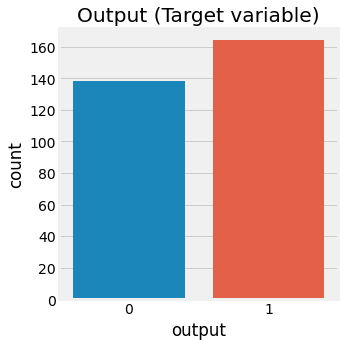

In [12]:
plt.figure(figsize = (5,5))
plt.style.use("fivethirtyeight")
plt.title("Output (Target variable)")
sns.countplot(df["output"])
plt.show()
#df['output'].value_counts(normalize=True)

# Sex

Looking at the difference in gender, a total of (68% are 1) whereas (31% is 0)

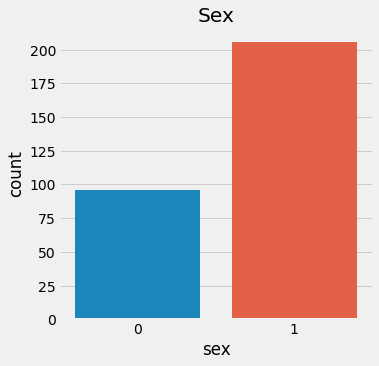

In [13]:
plt.figure(figsize = (5,5))
plt.title("Sex")
sns.countplot(df["sex"])
plt.show()
#df['sex'].value_counts(normalize=True)

# Age

The biggest age group is 58 years old, followed by 57 and 54.

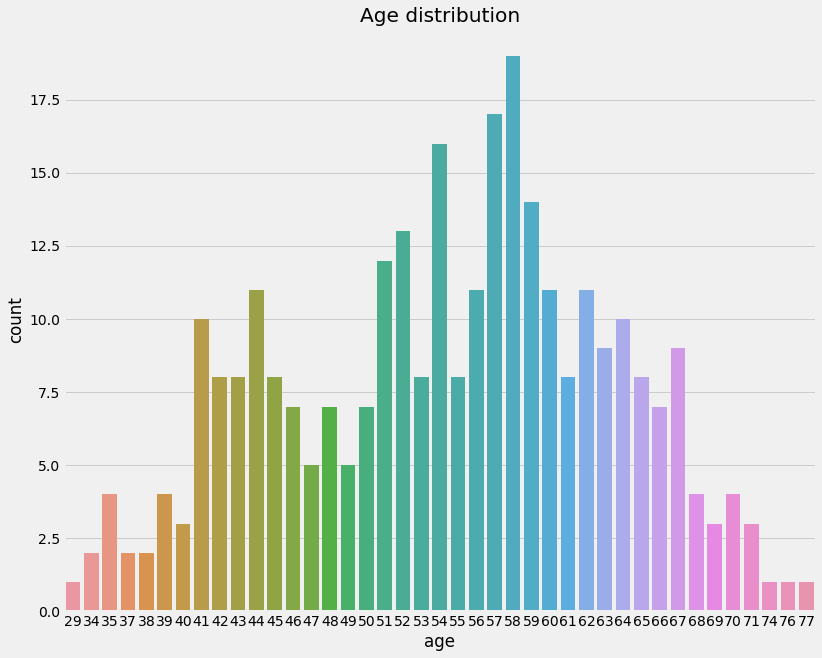

In [14]:
plt.figure(figsize = (12,10))
sns.countplot(df["age"])
plt.title("Age distribution")
plt.show()
#df['age'].value_counts()

# Correlation

The darker the worse

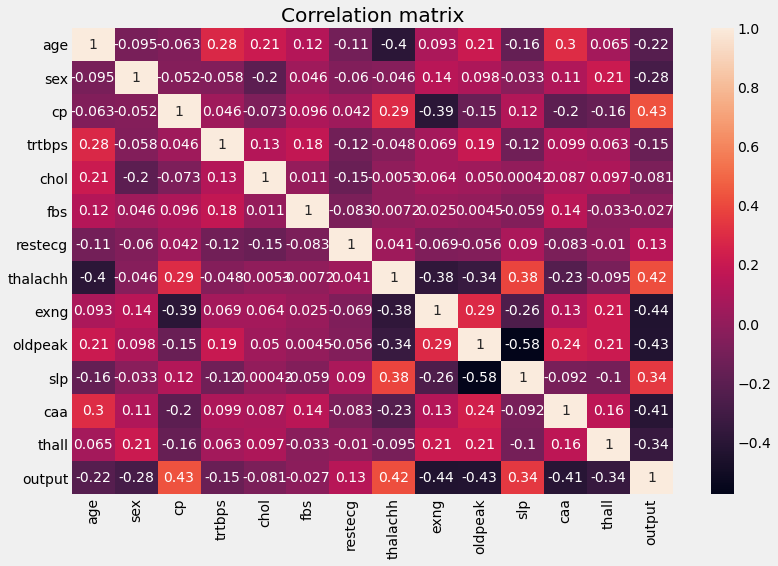

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [15]:
plt.figure(figsize = (12,8))
plt.title("Correlation matrix")
sns.heatmap(df.corr(), annot = True)
plt.show()
df.corr()

# Chest pain type

The most common is typical angina(0) with 143, non-anginal(2) with 86, atypical angina(1) with 50 and our lowest asymptomatic(3) with only 23.

It can also be observed people with typical angina(0) accounts for 46% of all the people.

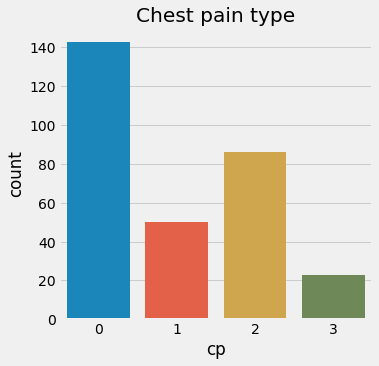

In [16]:
plt.figure(figsize = (5,5))
plt.title("Chest pain type")
sns.countplot(df['cp'])
plt.show()
#df['cp'].value_counts()

# Fasting blood sugar

Whereas 257 people that had a blood sugar below 120 mg/dl there were 45 people which had higher than the normal range.

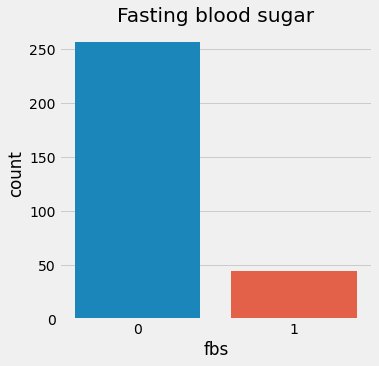

In [17]:
plt.figure(figsize = (5,5))
plt.title("Fasting blood sugar")
sns.countplot(df['fbs'])
plt.show()
#df['fbs'].value_counts()

# Resting electrocardiographic results

151 people had ST-T wave normality(1), 147 people were normal (0) and 4 people had left ventricular hypertrophy(2).

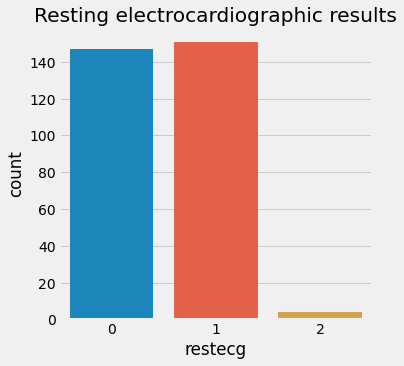

In [18]:
plt.figure(figsize = (5,5))
plt.title("Resting electrocardiographic results")
sns.countplot(df['restecg'])
plt.show()
#df['restecg'].value_counts()

# Exercise induced angina

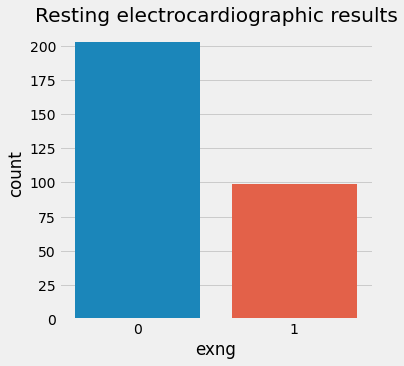

In [19]:
plt.figure(figsize = (5,5))
plt.title("Resting electrocardiographic results")
sns.countplot(df['exng'])
plt.show()
#df['exng'].value_counts()

# Resting blood pressure

Ideal blood pressure is considered to be between 90/60mmHg and 120/80mmHg.

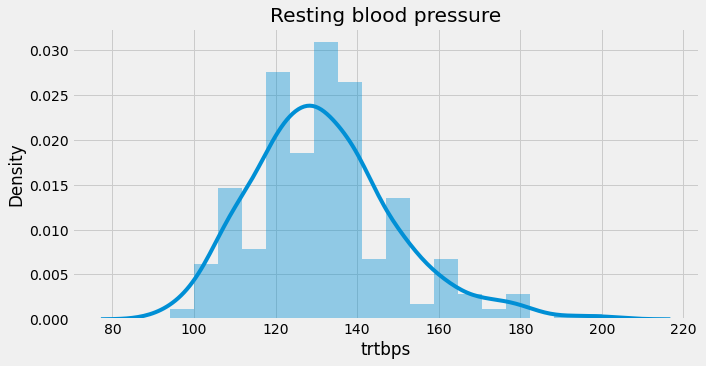

In [20]:
plt.figure(figsize = (10,5))
sns.distplot(df["trtbps"])
plt.title("Resting blood pressure")
plt.show()
#df['trtbps'].value_counts()

# Cholesterol

Ideal cholesterol would be below 200, anything above would be considered high.

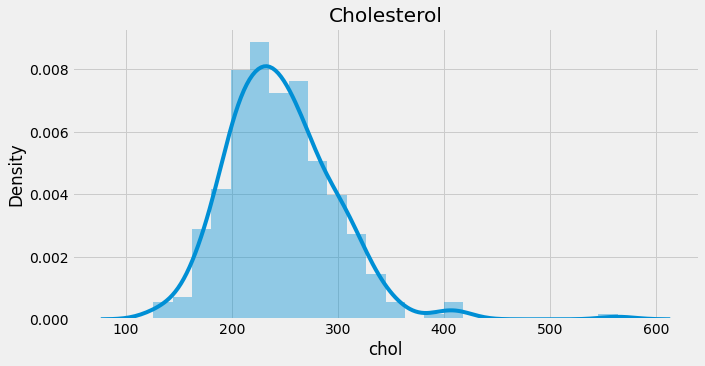

In [21]:
plt.figure(figsize = (10,5))
sns.distplot(df["chol"])
plt.title("Cholesterol")
plt.show()
#df['chol'].value_counts()

# Thalachh

Maximum heart rate is based on your age, to estimate your maximum age-related heart rate, subtract your age from 220.

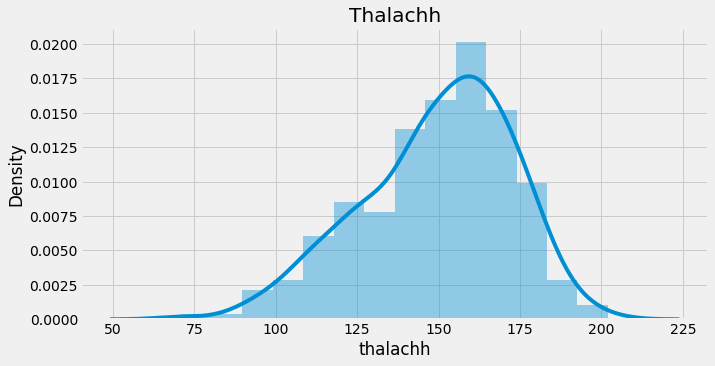

In [22]:
plt.figure(figsize = (10,5))
sns.distplot(df["thalachh"])
plt.title("Thalachh")
plt.show()
#df['thalachh'].value_counts()

# Diving deep

Heart attacks are more likely between the age of 40 and 55. (output 0 = lower chance, 1 = higher chance)

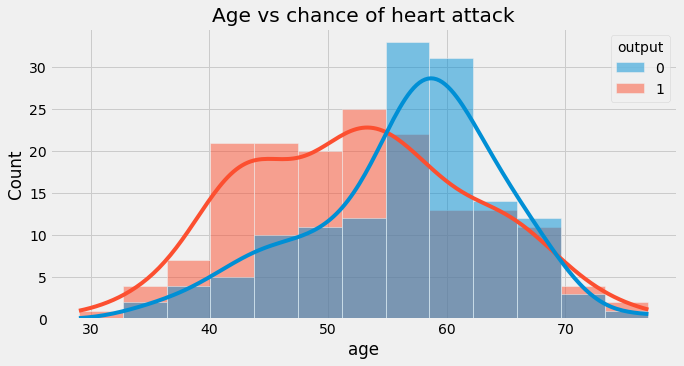

In [23]:
plt.figure(figsize = (10,5))
sns.histplot(x=df['age'],hue=df['output'],kde=True)
plt.title("Age vs chance of heart attack")
plt.show()

Sex 0 has a higher chance of getting a heart attack (output 0 = lower chance, 1 = higher chance)

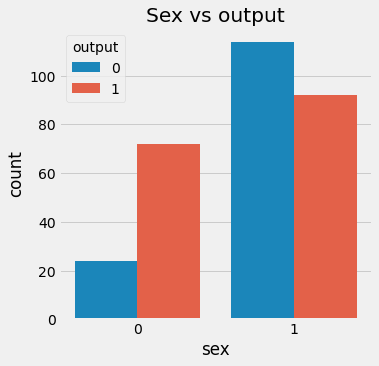

In [24]:
plt.figure(figsize = (5,5))
sns.countplot(x=df['sex'], hue=df['output'])
plt.title("Sex vs output")
plt.show()

Theres an increase in resting blood pressure the older you get.

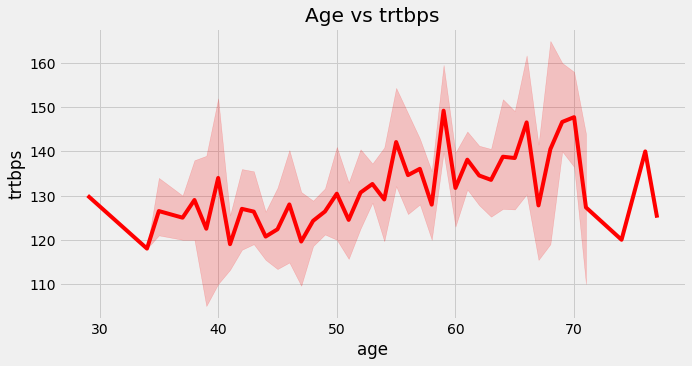

In [25]:
plt.figure(figsize=(10,5))
plt.style.use
sns.lineplot(x=df['age'],y=df['trtbps'], color='red')
plt.title("Age vs trtbps")
plt.show()

Theres an increase in cholesterol the older you get but there doesn't seem to be a relation in a higher chance of heart attack with an increase in cholesterol and age.

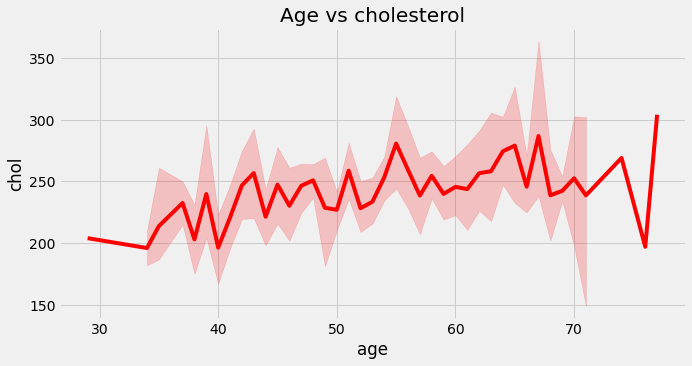

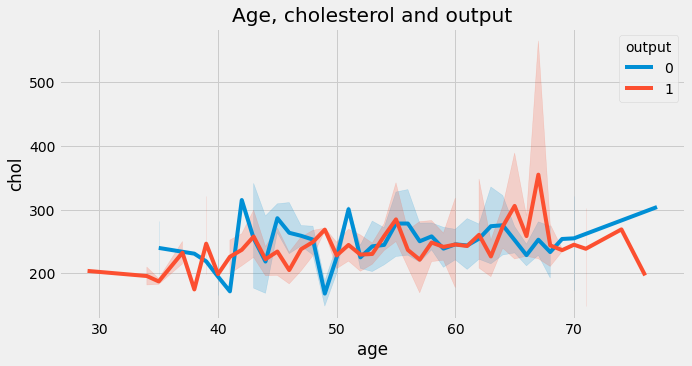

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['age'],y=df['chol'], color='red')
plt.title("Age vs cholesterol")
plt.figure(figsize=(10,5))
sns.lineplot(x=df['age'],y=df['chol'], hue=df['output'])
plt.title("Age, cholesterol and output")
plt.show()

# Splitting the dataset

In [27]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Feature scaling

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [30]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
acc=accuracy_score(Y_test, Y_pred)
print('Accuracy is', acc*100,'%')

Accuracy is 81.31868131868131 %


In [31]:
print(f"Classification report for {classifier}:\n"f"{metrics.classification_report(Y_test, Y_pred)}\n")

Classification report for LogisticRegression(random_state=42):
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.83      0.82      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91




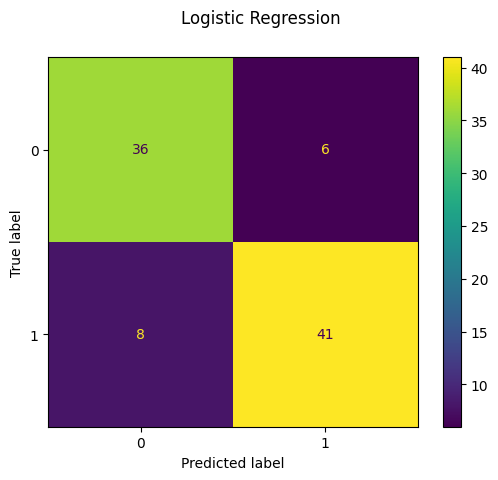

In [39]:
plt.style.use("default")
disp = metrics.plot_confusion_matrix(classifier, X_test, Y_test)
disp.figure_.suptitle("Logistic Regression")
plt.show()

# KNN

In [33]:
classifier = KNeighborsClassifier(n_neighbors= 5, p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy is', acc*100,'%')

Accuracy is 85.71428571428571 %


In [34]:
print(f"Classification report for {classifier}:\n"f"{metrics.classification_report(Y_test, Y_pred)}\n")

Classification report for KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.86      0.88      0.87        49

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91




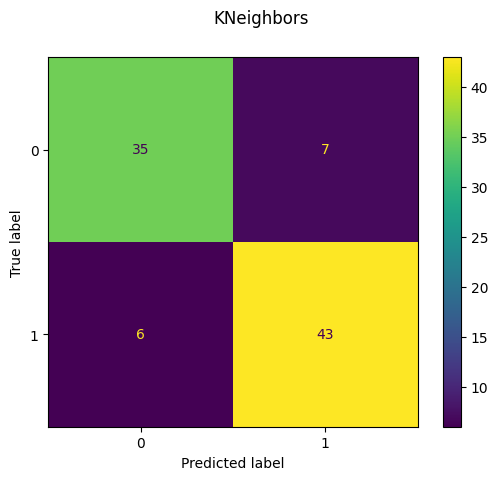

In [35]:
disp = metrics.plot_confusion_matrix(classifier, X_test, Y_test)
disp.figure_.suptitle("KNeighbors")
plt.show()

# Random Forest

In [36]:
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print('accuracy is', acc*100,'%')

accuracy is 84.61538461538461 %


In [37]:
print(f"Classification report for {classifier}:\n"f"{metrics.classification_report(Y_test, Y_pred)}\n")

Classification report for RandomForestClassifier(random_state=42):
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        42
           1       0.87      0.84      0.85        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91




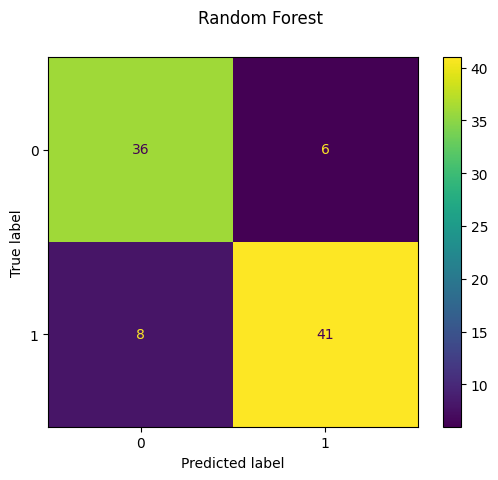

In [38]:
disp = metrics.plot_confusion_matrix(classifier, X_test, Y_test)
disp.figure_.suptitle("Random Forest")
plt.show()

# Final

KNN looks the most promising with 85% accuracy.